In [35]:
#Importing required modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [36]:
import mlflow
import os

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")

os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

mlflow.set_experiment("st125999_a3")

print("✅ Connected to AIT MLflow server as admin; experiment 'A3_st125999' set.")


✅ Connected to AIT MLflow server as admin; experiment 'A3_st125999' set.


In [37]:
df = pd.read_csv("Cars.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [38]:
df.shape

(8128, 13)

In [39]:

mappings = {'First Owner':1,
            'Second Owner':2,
            'Third Owner':3,
            'Fourth & Above Owner':4,
            'Test Drive Car':5}
df['owner']=df['owner'].map(mappings)
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [40]:
df=df[(df['fuel']!='LPG') & (df['fuel']!='CNG')]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [41]:
df['mileage']=df.mileage.str.split()
df['mileage']=df['mileage'].str[0].astype(float)

df['engine']=df.engine.str.split()
df['engine']=df['engine'].str[0].astype(float)

df['max_power']=df.max_power.str.split()
df['max_power']=df['max_power'].str[0].astype(float)

df['brand']=df.name.str.split()
df['brand']=df['brand'].str[0].astype(str)
                                    

df[['engine','mileage','max_power','brand']].head()

,engine,mileage,max_power,brand
0,1248.0,23.40,74.00,Maruti
1,1498.0,21.14,103.52,Skoda
2,1497.0,17.70,78.00,Honda
3,1396.0,23.00,90.00,Hyundai
4,1298.0,16.10,88.20,Maruti


In [42]:
df=df.drop(labels='torque',axis='columns')
df=df.drop(labels='name',axis='columns')
df=df[df['owner']!=5]

In [43]:
# 2️⃣ Fill all missing values in one step
df[["mileage", "engine", "max_power"]] = (
    df.groupby("brand")[["mileage", "engine", "max_power"]]
      .transform(lambda x: x.fillna(x.median()))
)

# 3️⃣ Fill seats with mode (most frequent value)
df["seats"].fillna(df["seats"].mode()[0], inplace=True)

/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/4003814106.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["seats"].fillna(df["seats"].mode()[0], inplace=True)


In [44]:
df.dropna(subset=["mileage", "engine", "max_power"], inplace=True)
df.reset_index(drop=True, inplace=True)


In [45]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,Maruti


In [46]:
df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
brand            0
dtype: int64

In [47]:
df.shape

(8027, 12)

#using the preprocessed dataset from a1/a2

A3

In [48]:
#checking the quartile ranges of selling price label
print(df["selling_price"].describe())


count    8.027000e+03
mean     6.404663e+05
std      8.027251e+05
min      2.999900e+04
25%      2.600000e+05
50%      4.500000e+05
75%      6.800000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


In [49]:
# biining selling price into 4 classes based on percentiles (using pd.cut())
import pandas as pd

bins = [0, 260000, 450000, 680000, df["selling_price"].max()]

# class labels are 0, 1, 2, 3
labels = [0, 1, 2, 3]

# binning the selling_price into 4 classes
df["selling_price_binned"] = pd.cut(
    df["selling_price"],
    bins=bins,
    labels=labels,
    include_lowest=True
).astype(int)

# printing the binned classes
print(df[["selling_price", "selling_price_binned"]].head(10))
print("\nClass distribution:")
print(df["selling_price_binned"].value_counts())


   selling_price  selling_price_binned
0         450000                     1
1         370000                     1
2         158000                     0
3         225000                     0
4         130000                     0
5         440000                     1
6          45000                     0
7         350000                     1
8         200000                     0
9         500000                     2

Class distribution:
selling_price_binned
0    2049
1    2044
3    1991
2    1943
Name: count, dtype: int64


#the price classes seem equally balanced

In [50]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,selling_price_binned
0,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,Maruti,1
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,Skoda,1
2,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,Honda,0
3,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,Hyundai,0
4,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,Maruti,0


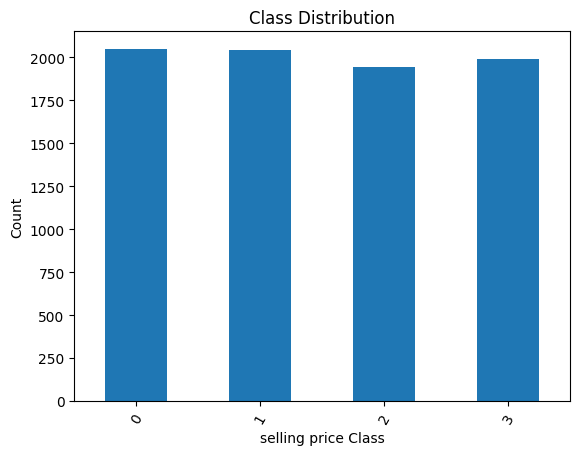

In [51]:
#plotting to check blance of classes
import matplotlib.pyplot as plt
df["selling_price_binned"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("selling price Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=60)
plt.show()


In [52]:
df.dtypes

year                      int64
selling_price             int64
km_driven                 int64
fuel                     object
seller_type              object
transmission             object
owner                     int64
mileage                 float64
engine                  float64
max_power               float64
seats                   float64
brand                    object
selling_price_binned      int64
dtype: object

#As seen above the price classes(created above) are mostly balanced

In [53]:
from sklearn.preprocessing import LabelEncoder
le_brand = LabelEncoder()
le_fuel = LabelEncoder()

df['brand'] = le_brand.fit_transform(df['brand'])
df['fuel'] = le_fuel.fit_transform(df['fuel'])

In [54]:
import numpy as np

# Features
numeric_features = ['year', 'max_power', 'mileage']
categorical_features = ['brand', 'fuel']

X = df[numeric_features + categorical_features]

# Target (binned classes, already 0–3)
y = df["selling_price_binned"].astype(int)

# Check shapes & types
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X type:", type(X))
print("y type:", type(y))
print("Unique y values:", y.unique())


X shape: (8027, 5)
y shape: (8027,)
X type: <class 'pandas.core.frame.DataFrame'>
y type: <class 'pandas.core.series.Series'>
Unique y values: [1 0 2 3]


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
y_train.shape, y_test.shape

((5618,), (2409,))

In [57]:
print(X_train)

      year  max_power  mileage  brand  fuel
6764  2015      72.40    13.58      4     0
1485  2013      62.10    15.96     19     0
5738  2015      68.05    19.81     11     1
1272  2010      90.00    18.80     27     0
1411  2010      90.00    23.00     11     0
...    ...        ...      ...    ...   ...
5226  2013      78.90    20.36     11     1
5390  2016      67.04    20.51     20     1
860   2015      88.76    20.77     20     0
7603  2017     177.00    19.33     13     0
7270  2017      97.90    25.60     10     0

[5618 rows x 5 columns]


In [58]:
from sklearn.preprocessing import StandardScaler
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
print(X_train)

[[ 0.29292221 -0.5546834  -1.45939196 -1.94723645 -0.89898559]
 [-0.20765177 -0.84660999 -0.85939564  0.17122126 -0.89898559]
 [ 0.29292221 -0.67797278  0.11118665 -0.95862285  1.11236488]
 ...
 [ 0.29292221 -0.09100194  0.35320197  0.31245177 -0.89898559]
 [ 0.79349619  2.40993031 -0.00982101 -0.67616183 -0.89898559]
 [ 0.79349619  0.16804748  1.57084157 -1.09985337 -0.89898559]]


In [60]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

In [61]:
# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [62]:
Y_train_encoded.shape

(5618, 4)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import time

class LogisticRegression:
    
    def __init__(self, k, n, method, alpha=0.001, epochs=500, max_iter=5000, use_penalty=False, lambda_=0.01):
       
        self.k = k  
        self.n = n  
        self.alpha = alpha
        self.epochs = epochs
        self.max_iter = max_iter
        self.method = method
        self.use_penalty = use_penalty
        self.lambda_ = lambda_

    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []

        # Steps per epoch for info/logging only
        steps_per_epoch = self.max_iter // self.epochs

        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)
                self.W -= self.alpha * grad
                if i % steps_per_epoch == 0:
                    epoch_num = i // steps_per_epoch
                    print(f"Epoch {epoch_num}/{self.epochs} | Iter {i} | Loss: {loss:.4f}")
            print(f"Time taken: {time.time() - start_time:.2f}s")

        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0])
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W -= self.alpha * grad
                if i % steps_per_epoch == 0:
                    epoch_num = i // steps_per_epoch
                    print(f"Epoch {epoch_num}/{self.epochs} | Iter {i} | Loss: {loss:.4f}")
            print(f"Time taken: {time.time() - start_time:.2f}s")

        elif self.method == "sto":
            start_time = time.time()
            used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W -= self.alpha * grad

                used_ix.append(i)
                if len(used_ix) == X.shape[0]:
                    used_ix = []

                if i % steps_per_epoch == 0:
                    epoch_num = i // steps_per_epoch
                    print(f"Epoch {epoch_num}/{self.epochs} | Iter {i} | Loss: {loss:.4f}")
            print(f"Time taken: {time.time() - start_time:.2f}s")

        else:
            raise ValueError('Method must be "batch", "minibatch" or "sto".')

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        # Cross-entropy loss
        loss = - np.sum(Y * np.log(h + 1e-9)) / m
        # Add Ridge (L2) penalty
        if self.use_penalty:
            loss += (self.lambda_ / (2 * m)) * np.sum(self.W ** 2)
        error = h - Y
        grad = self.softmax_grad(X, error) / m
        # Add penalty to gradient
        if self.use_penalty:
            grad += (self.lambda_ / m) * self.W
        return loss, grad

    def softmax(self, theta_t_x):
        exp_scores = np.exp(theta_t_x - np.max(theta_t_x, axis=1, keepdims=True))  # stability
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return X.T @ error

    def h_theta(self, X, W):
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Loss Curve")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    # -----------------------
    # Evaluation Metrics
    # -----------------------
    def accuracy(self, y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)
    
    def precision_recall_f1_per_class(self, y_true, y_pred):
        classes = np.unique(y_true)
        precision, recall, f1, support = {}, {}, {}, {}
        for c in classes:
            TP = np.sum((y_true == c) & (y_pred == c))
            FP = np.sum((y_true != c) & (y_pred == c))
            FN = np.sum((y_true == c) & (y_pred != c))
            prec = TP / (TP + FP) if (TP + FP) != 0 else 0
            rec = TP / (TP + FN) if (TP + FN) != 0 else 0
            f1_c = (2 * prec * rec) / (prec + rec) if (prec + rec) != 0 else 0
            precision[c], recall[c], f1[c], support[c] = prec, rec, f1_c, np.sum(y_true == c)
        return precision, recall, f1, support
    
    def macro_avg(self, precision, recall, f1):
        return np.mean(list(precision.values())), np.mean(list(recall.values())), np.mean(list(f1.values()))
    
    def weighted_avg(self, precision, recall, f1, support):
        total = np.sum(list(support.values()))
        wp = np.sum([precision[c] * support[c] for c in support]) / total
        wr = np.sum([recall[c] * support[c] for c in support]) / total
        wf = np.sum([f1[c] * support[c] for c in support]) / total
        return wp, wr, wf
    
    def classification_report(self, y_true, y_pred):
        precision, recall, f1, support = self.precision_recall_f1_per_class(y_true, y_pred)
        macro_p, macro_r, macro_f = self.macro_avg(precision, recall, f1)
        weighted_p, weighted_r, weighted_f = self.weighted_avg(precision, recall, f1, support)
        acc = self.accuracy(y_true, y_pred)

        print("Class\tPrecision\tRecall\tF1-Score\tSupport")
        print("-" * 60)
        for c in precision.keys():
            print(f"{c}\t{precision[c]:.2f}\t\t{recall[c]:.2f}\t{f1[c]:.2f}\t\t{support[c]}")
        print("-" * 60)
        print(f"Macro Avg\t{macro_p:.2f}\t\t{macro_r:.2f}\t{macro_f:.2f}")
        print(f"Weighted Avg\t{weighted_p:.2f}\t\t{weighted_r:.2f}\t{weighted_f:.2f}")
        print(f"Accuracy\t{acc:.2f}")


/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:99: RuntimeWarning: divide by zero encountered in matmul
  return self.softmax(X @ W)
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:99: RuntimeWarning: overflow encountered in matmul
  return self.softmax(X @ W)
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:99: RuntimeWarning: invalid value encountered in matmul
  return self.softmax(X @ W)
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:96: RuntimeWarning: divide by zero encountered in matmul
  return X.T @ error
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:96: RuntimeWarning: overflow encountered in matmul
  return X.T @ error
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:96: RuntimeWarning: invalid value encountered in matmul
  return X.T @ error


Epoch 0/500 | Iter 0 | Loss: 1.5094
Epoch 1/500 | Iter 4 | Loss: 1.4980
Epoch 2/500 | Iter 8 | Loss: 1.4869
Epoch 3/500 | Iter 12 | Loss: 1.4761
Epoch 4/500 | Iter 16 | Loss: 1.4655
Epoch 5/500 | Iter 20 | Loss: 1.4552
Epoch 6/500 | Iter 24 | Loss: 1.4451
Epoch 7/500 | Iter 28 | Loss: 1.4354
Epoch 8/500 | Iter 32 | Loss: 1.4258
Epoch 9/500 | Iter 36 | Loss: 1.4165
Epoch 10/500 | Iter 40 | Loss: 1.4075
Epoch 11/500 | Iter 44 | Loss: 1.3986
Epoch 12/500 | Iter 48 | Loss: 1.3900
Epoch 13/500 | Iter 52 | Loss: 1.3816
Epoch 14/500 | Iter 56 | Loss: 1.3734
Epoch 15/500 | Iter 60 | Loss: 1.3654
Epoch 16/500 | Iter 64 | Loss: 1.3576
Epoch 17/500 | Iter 68 | Loss: 1.3500
Epoch 18/500 | Iter 72 | Loss: 1.3426
Epoch 19/500 | Iter 76 | Loss: 1.3354
Epoch 20/500 | Iter 80 | Loss: 1.3283
Epoch 21/500 | Iter 84 | Loss: 1.3214
Epoch 22/500 | Iter 88 | Loss: 1.3147
Epoch 23/500 | Iter 92 | Loss: 1.3082
Epoch 24/500 | Iter 96 | Loss: 1.3017
Epoch 25/500 | Iter 100 | Loss: 1.2955
Epoch 26/500 | Iter 104 

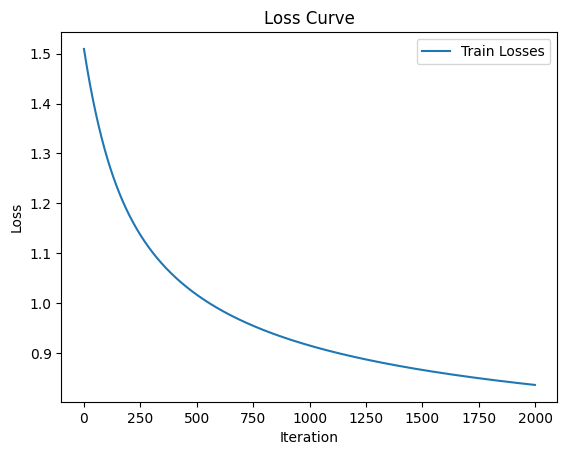

Class	Precision	Recall	F1-Score	Support
------------------------------------------------------------
0	0.76		0.83	0.79		639
1	0.57		0.49	0.53		614
2	0.55		0.53	0.54		564
3	0.71		0.76	0.73		592
------------------------------------------------------------
Macro Avg	0.65		0.65	0.65
Weighted Avg	0.65		0.66	0.65
Accuracy	0.66


In [64]:
#model = LogisticRegression(k=k, n=n, method="batch", alpha=0.01, max_iter=2000)
model = LogisticRegression(k=k, n=n, method="batch", alpha=0.01, max_iter=2000, use_penalty=False, lambda_=0.1)
model.fit(X_train, Y_train_encoded)
model.plot()

y_pred = model.predict(X_test)
model.classification_report(y_test, y_pred)


Epoch 0/500 | Iter 0 | Loss: 1.5347
Epoch 1/500 | Iter 4 | Loss: 1.5382
Epoch 2/500 | Iter 8 | Loss: 1.4854
Epoch 3/500 | Iter 12 | Loss: 1.4901
Epoch 4/500 | Iter 16 | Loss: 1.5036
Epoch 5/500 | Iter 20 | Loss: 1.4934
Epoch 6/500 | Iter 24 | Loss: 1.4731
Epoch 7/500 | Iter 28 | Loss: 1.4267
Epoch 8/500 | Iter 32 | Loss: 1.4606
Epoch 9/500 | Iter 36 | Loss: 1.4248
Epoch 10/500 | Iter 40 | Loss: 1.4283
Epoch 11/500 | Iter 44 | Loss: 1.4340
Epoch 12/500 | Iter 48 | Loss: 1.4253
Epoch 13/500 | Iter 52 | Loss: 1.3759
Epoch 14/500 | Iter 56 | Loss: 1.4034
Epoch 15/500 | Iter 60 | Loss: 1.3760
Epoch 16/500 | Iter 64 | Loss: 1.3847
Epoch 17/500 | Iter 68 | Loss: 1.3793
Epoch 18/500 | Iter 72 | Loss: 1.3444
Epoch 19/500 | Iter 76 | Loss: 1.3391
Epoch 20/500 | Iter 80 | Loss: 1.3515
Epoch 21/500 | Iter 84 | Loss: 1.3406
Epoch 22/500 | Iter 88 | Loss: 1.3364
Epoch 23/500 | Iter 92 | Loss: 1.3011
Epoch 24/500 | Iter 96 | Loss: 1.3282
Epoch 25/500 | Iter 100 | Loss: 1.2872
Epoch 26/500 | Iter 104 

/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:99: RuntimeWarning: divide by zero encountered in matmul
  return self.softmax(X @ W)
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:99: RuntimeWarning: overflow encountered in matmul
  return self.softmax(X @ W)
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:99: RuntimeWarning: invalid value encountered in matmul
  return self.softmax(X @ W)
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:96: RuntimeWarning: divide by zero encountered in matmul
  return X.T @ error
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:96: RuntimeWarning: overflow encountered in matmul
  return X.T @ error
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:96: RuntimeWarning: invalid value encountered in matmul
  return X.T @ error


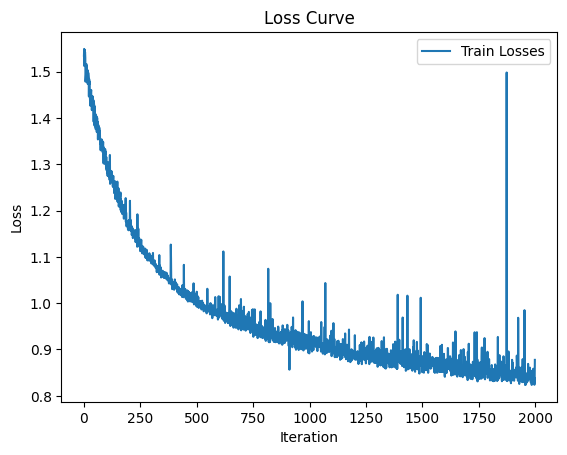

Class	Precision	Recall	F1-Score	Support
------------------------------------------------------------
0	0.77		0.80	0.79		639
1	0.55		0.51	0.53		614
2	0.55		0.49	0.52		564
3	0.70		0.79	0.74		592
------------------------------------------------------------
Macro Avg	0.64		0.65	0.64
Weighted Avg	0.64		0.65	0.65
Accuracy	0.65


In [65]:
# Initialize model with mini-batch + L2 penalty
model = LogisticRegression(
    k=k,
    n=n,
    method="minibatch",  
    alpha=0.01,
    max_iter=2000,
    use_penalty=True,    
    lambda_=0.1           
)

# Train model
model.fit(X_train, Y_train_encoded)

# Plot loss curve
model.plot()

# Predict on test set
y_pred = model.predict(X_test)

# Print classification report
model.classification_report(y_test, y_pred)


In [66]:
import joblib
import mlflow
import os
import matplotlib.pyplot as plt

# ✅ Connect to AIT MLflow server
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"
mlflow.set_experiment("st125999_a3")

print("✅ Connected to AIT MLflow server as admin; experiment 'A3_st125999' set.")

# ✅ Run all three optimization methods
methods = ["batch", "minibatch", "sto"]

for method in methods:
    print(f"\n🚀 Running {method.upper()} Optimization...\n")

    model = LogisticRegression(
        k=Y_train_encoded.shape[1],
        n=X_train.shape[1],
        method=method,
        alpha=0.001,
        epochs=500,          # ✅ Added epochs
        max_iter=2000,
        use_penalty=True,
        lambda_=0.1
    )

    with mlflow.start_run(run_name=f"{method}_L2_reg"):
        # Log hyperparameters
        mlflow.log_params({
            "method": method,
            "alpha": model.alpha,
            "epochs": model.epochs,      # ✅ Log epochs
            "max_iter": model.max_iter,
            "lambda_": model.lambda_,
            "use_penalty": model.use_penalty,
            "n_classes": model.k,
            "n_features": model.n
        })

        # ⏱ Train model
        model.fit(X_train, Y_train_encoded)

        # 🔮 Predict
        y_pred = model.predict(X_test)

        # 🎯 Evaluate
        acc = model.accuracy(y_test, y_pred)
        precision, recall, f1, support = model.precision_recall_f1_per_class(y_test, y_pred)
        macro_p, macro_r, macro_f = model.macro_avg(precision, recall, f1)
        weighted_p, weighted_r, weighted_f = model.weighted_avg(precision, recall, f1, support)

        # 📈 Log metrics
        mlflow.log_metrics({
            "accuracy": acc,
            "macro_precision": macro_p,
            "macro_recall": macro_r,
            "macro_f1": macro_f,
            "weighted_precision": weighted_p,
            "weighted_recall": weighted_r,
            "weighted_f1": weighted_f
        })

        # Per-class metrics
        for c in precision.keys():
            mlflow.log_metric(f"precision_class_{c}", precision[c])
            mlflow.log_metric(f"recall_class_{c}", recall[c])
            mlflow.log_metric(f"f1_class_{c}", f1[c])

        # 📉 Plot loss curve
        plt.figure(figsize=(6, 4))
        plt.plot(model.losses, label=f"{method} Loss")
        plt.title(f"Loss Curve ({method})")
        plt.xlabel("Epoch")              # ✅ More appropriate now
        plt.ylabel("Loss")
        plt.legend()
        fname = f"loss_curve_{method}.png"
        plt.savefig(fname)
        plt.close()

        # Log artifact
        mlflow.log_artifact(fname)

        # 💾 Save & log trained model ✅
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"{method}_model"
        )

        print(f"✅ {method.upper()} DONE | Accuracy: {acc:.4f} | Macro F1: {macro_f:.4f}")

print("\n🏁 All optimization experiments completed and logged to MLflow!")
print("🔗 View results: https://mlflow.ml.brain.cs.ait.ac.th")

✅ Connected to AIT MLflow server as admin; experiment 'A3_st125999' set.

🚀 Running BATCH Optimization...



/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:99: RuntimeWarning: divide by zero encountered in matmul
  return self.softmax(X @ W)
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:99: RuntimeWarning: overflow encountered in matmul
  return self.softmax(X @ W)
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:99: RuntimeWarning: invalid value encountered in matmul
  return self.softmax(X @ W)
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:96: RuntimeWarning: divide by zero encountered in matmul
  return X.T @ error
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:96: RuntimeWarning: overflow encountered in matmul
  return X.T @ error
/var/folders/ql/b2rphw6s4db5krtz1b0b3z7r0000gn/T/ipykernel_36072/1517943253.py:96: RuntimeWarning: invalid value encountered in matmul
  return X.T @ error


Epoch 0/500 | Iter 0 | Loss: 1.4543
Epoch 1/500 | Iter 4 | Loss: 1.4532
Epoch 2/500 | Iter 8 | Loss: 1.4522
Epoch 3/500 | Iter 12 | Loss: 1.4511
Epoch 4/500 | Iter 16 | Loss: 1.4500
Epoch 5/500 | Iter 20 | Loss: 1.4489
Epoch 6/500 | Iter 24 | Loss: 1.4479
Epoch 7/500 | Iter 28 | Loss: 1.4468
Epoch 8/500 | Iter 32 | Loss: 1.4457
Epoch 9/500 | Iter 36 | Loss: 1.4447
Epoch 10/500 | Iter 40 | Loss: 1.4436
Epoch 11/500 | Iter 44 | Loss: 1.4426
Epoch 12/500 | Iter 48 | Loss: 1.4415
Epoch 13/500 | Iter 52 | Loss: 1.4405
Epoch 14/500 | Iter 56 | Loss: 1.4394
Epoch 15/500 | Iter 60 | Loss: 1.4384
Epoch 16/500 | Iter 64 | Loss: 1.4374
Epoch 17/500 | Iter 68 | Loss: 1.4363
Epoch 18/500 | Iter 72 | Loss: 1.4353
Epoch 19/500 | Iter 76 | Loss: 1.4343
Epoch 20/500 | Iter 80 | Loss: 1.4332
Epoch 21/500 | Iter 84 | Loss: 1.4322
Epoch 22/500 | Iter 88 | Loss: 1.4312
Epoch 23/500 | Iter 92 | Loss: 1.4302
Epoch 24/500 | Iter 96 | Loss: 1.4292
Epoch 25/500 | Iter 100 | Loss: 1.4282
Epoch 26/500 | Iter 104 

2025/10/05 00:56:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 00:57:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ BATCH DONE | Accuracy: 0.4575 | Macro F1: 0.4306
🏃 View run batch_L2_reg at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/930466277354100292/runs/63acf7430e1e42638860cde3c40e285d
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/930466277354100292

🚀 Running MINIBATCH Optimization...

Epoch 0/500 | Iter 0 | Loss: 1.5273
Epoch 1/500 | Iter 4 | Loss: 1.5107
Epoch 2/500 | Iter 8 | Loss: 1.5318
Epoch 3/500 | Iter 12 | Loss: 1.5169
Epoch 4/500 | Iter 16 | Loss: 1.5085
Epoch 5/500 | Iter 20 | Loss: 1.4924
Epoch 6/500 | Iter 24 | Loss: 1.4911
Epoch 7/500 | Iter 28 | Loss: 1.5188
Epoch 8/500 | Iter 32 | Loss: 1.4903
Epoch 9/500 | Iter 36 | Loss: 1.4788
Epoch 10/500 | Iter 40 | Loss: 1.5053
Epoch 11/500 | Iter 44 | Loss: 1.5202
Epoch 12/500 | Iter 48 | Loss: 1.5231
Epoch 13/500 | Iter 52 | Loss: 1.5072
Epoch 14/500 | Iter 56 | Loss: 1.5099
Epoch 15/500 | Iter 60 | Loss: 1.4747
Epoch 16/500 | Iter 64 | Loss: 1.5163
Epoch 17/500 | Iter 68 | Loss: 1.5138
Epoch 18/500

2025/10/05 00:57:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 00:57:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ MINIBATCH DONE | Accuracy: 0.4907 | Macro F1: 0.4942
🏃 View run minibatch_L2_reg at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/930466277354100292/runs/cad17a4e6b0c4106b53ea5f41cea7afd
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/930466277354100292

🚀 Running STO Optimization...

Epoch 0/500 | Iter 0 | Loss: 1.8086
Epoch 1/500 | Iter 4 | Loss: 1.9056
Epoch 2/500 | Iter 8 | Loss: 2.5727
Epoch 3/500 | Iter 12 | Loss: 1.3358
Epoch 4/500 | Iter 16 | Loss: 1.9236
Epoch 5/500 | Iter 20 | Loss: 1.1601
Epoch 6/500 | Iter 24 | Loss: 2.1028
Epoch 7/500 | Iter 28 | Loss: 1.5751
Epoch 8/500 | Iter 32 | Loss: 1.8727
Epoch 9/500 | Iter 36 | Loss: 2.0182
Epoch 10/500 | Iter 40 | Loss: 2.4184
Epoch 11/500 | Iter 44 | Loss: 0.9873
Epoch 12/500 | Iter 48 | Loss: 1.1587
Epoch 13/500 | Iter 52 | Loss: 1.6568
Epoch 14/500 | Iter 56 | Loss: 2.0974
Epoch 15/500 | Iter 60 | Loss: 1.4549
Epoch 16/500 | Iter 64 | Loss: 1.3920
Epoch 17/500 | Iter 68 | Loss: 1.1388
Epoch 18/5

2025/10/05 00:57:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 00:57:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ STO DONE | Accuracy: 0.4923 | Macro F1: 0.4136
🏃 View run sto_L2_reg at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/930466277354100292/runs/5b3150a9b2b142b095fef5d349d56e70
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/930466277354100292

🏁 All optimization experiments completed and logged to MLflow!
🔗 View results: https://mlflow.ml.brain.cs.ait.ac.th


In [67]:
import os
import time
import mlflow
from mlflow.tracking import MlflowClient
from mlflow.exceptions import MlflowException

# ✅ Connect
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")

experiment_name = "st125999_a3"
model_name = "st125999-a3-model"

client = MlflowClient()
experiment = client.get_experiment_by_name(experiment_name)
if experiment is None:
    raise ValueError(f"❌ Experiment '{experiment_name}' not found!")

# ✅ Find best run by accuracy
runs = client.search_runs(
    experiment_ids=[experiment.experiment_id],
    order_by=["metrics.accuracy DESC"],
    max_results=1
)
if not runs:
    raise ValueError("❌ No runs found.")

best_run = runs[0]
best_run_id = best_run.info.run_id
best_acc = best_run.data.metrics.get("accuracy", 0.0)
print(f"🏆 Best run: {best_run_id} | Accuracy: {best_acc:.4f}")

# ✅ Find which artifact path exists in this run
possible_paths = ["batch_model", "minibatch_model", "sto_model"]
found_path = None
for path in possible_paths:
    try:
        artifacts = client.list_artifacts(best_run_id, path)
        if artifacts:  # if directory exists
            found_path = path
            break
    except MlflowException:
        continue

if found_path is None:
    raise ValueError(f"❌ No logged model found under any expected path in run {best_run_id}")

print(f"📁 Found model artifact path: '{found_path}'")

# ✅ Register model
model_uri = f"runs:/{best_run_id}/{found_path}"
print(f"📦 Registering model from: {model_uri}")
registered = mlflow.register_model(model_uri=model_uri, name=model_name)
new_version = registered.version
print(f"✅ Registered '{model_name}' version {new_version}")

# ✅ Wait and set alias
time.sleep(5)
try:
    client.set_registered_model_alias(
        name=model_name,
        alias="Staging",
        version=new_version
    )
    print(f"🎯 Set alias 'Staging' for {model_name} v{new_version}")
except Exception as e:
    print("⚠️ Alias assignment failed:", e)


🏆 Best run: 71cb9116e48a4541814066e11916fb48 | Accuracy: 0.5496
📁 Found model artifact path: 'minibatch_model'
📦 Registering model from: runs:/71cb9116e48a4541814066e11916fb48/minibatch_model


Registered model 'st125999-a3-model' already exists. Creating a new version of this model...
2025/10/05 00:57:40 WARNING mlflow.tracking._model_registry.fluent: Run with id 71cb9116e48a4541814066e11916fb48 has no artifacts at artifact path 'minibatch_model', registering model based on models:/m-3c6f2e7cc28e4991bc34a0e3d36a2625 instead
2025/10/05 00:57:40 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st125999-a3-model, version 7
Created version '7' of model 'st125999-a3-model'.


✅ Registered 'st125999-a3-model' version 7
🎯 Set alias 'Staging' for st125999-a3-model v7


In [68]:
client.search_model_versions("name='st125999-a3-model'")


[<ModelVersion: aliases=['Staging'], creation_timestamp=1759600653314, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1759600653314, metrics=None, model_id=None, name='st125999-a3-model', params=None, run_id='71cb9116e48a4541814066e11916fb48', run_link='', source='models:/m-3c6f2e7cc28e4991bc34a0e3d36a2625', status='READY', status_message=None, tags={}, user_id='', version='7'>,
 <ModelVersion: aliases=[], creation_timestamp=1759599883298, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1759599883298, metrics=None, model_id=None, name='st125999-a3-model',

In [69]:
import os, mlflow
from mlflow.tracking import MlflowClient

os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
client = MlflowClient()

# Check if registry responds to GET calls
for mv in client.search_model_versions("name='st125999-a3-model'"):
    print(f"Version {mv.version} | Stage: {mv.current_stage} | Status: {mv.status}")


Version 7 | Stage: None | Status: READY
Version 6 | Stage: None | Status: READY
Version 5 | Stage: None | Status: READY
Version 4 | Stage: None | Status: READY
Version 3 | Stage: None | Status: READY
Version 2 | Stage: None | Status: READY
Version 1 | Stage: None | Status: READY


#inference

In [75]:
import os
import mlflow
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# =====================================
# 1) Load model from MLflow
# =====================================
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

MODEL_NAME = "st125999-a3-model"
ALIAS = "Staging"

print("🔗 Loading model from MLflow registry...")
model = mlflow.pyfunc.load_model(model_uri=f"models:/{MODEL_NAME}@{ALIAS}")
print("✅ Model loaded successfully!\n")

# =====================================
# 2) New test data (with true labels)
#    Edit/expand these rows as you like
# =====================================
new_data = pd.DataFrame([
    [2018,  85.0, 20.0, "Maruti",  "Petrol", 2],
    [2014, 120.0, 16.0, "Hyundai", "Diesel", 3],
    [2020,  90.0, 22.5, "Honda",   "Petrol", 1],
    [2015,  70.0, 24.0, "Tata",    "Diesel", 0],
    [2019, 110.0, 18.0, "Ford",    "Petrol", 2],
], columns=["year", "max_power", "mileage", "brand", "fuel", "true_label"])

print("📋 New test samples:")
print(new_data)

# =====================================
# 3) Preprocess EXACTLY like training
#    (LabelEncode -> StandardScale -> add intercept)
# =====================================
X_raw = new_data[["year", "max_power", "mileage", "brand", "fuel"]].copy()
y_true = new_data["true_label"].astype(int).values

le_brand = LabelEncoder()
le_fuel  = LabelEncoder()
X_raw["brand"] = le_brand.fit_transform(X_raw["brand"])
X_raw["fuel"]  = le_fuel.fit_transform(X_raw["fuel"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw.values)

X_infer = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # add bias
print("\n🧭 Sanity Check: X_infer shape =", X_infer.shape)

# =====================================
# 4) Predict with the loaded model
# =====================================
y_pred = model.predict(X_infer).astype(int)
new_data["predicted_class"] = y_pred

print("\n✅ Predictions:")
print(new_data[["year", "brand", "fuel", "true_label", "predicted_class"]])

# =====================================
# 5) Print YOUR metrics using YOUR class
#    (Assumes your LogisticRegression class is already defined above)
# =====================================
k = len(np.unique(y_true))
n = X_infer.shape[1]
dummy = LogisticRegression(k=k, n=n, method="batch")  # weights not used for metrics

print("\n📊 Classification Report:")
dummy.classification_report(y_true, y_pred)

# If you also want the individual numbers:
precision, recall, f1, support = dummy.precision_recall_f1_per_class(y_true, y_pred)
macro_p, macro_r, macro_f = dummy.macro_avg(precision, recall, f1)
weighted_p, weighted_r, weighted_f = dummy.weighted_avg(precision, recall, f1, support)
acc = dummy.accuracy(y_true, y_pred)

print("\n— Extras —")
print(f"Accuracy:        {acc:.4f}")
print(f"Macro Precision: {macro_p:.4f} | Macro Recall: {macro_r:.4f} | Macro F1: {macro_f:.4f}")
print(f"Wtd Precision:   {weighted_p:.4f} | Wtd Recall:   {weighted_r:.4f} | Wtd F1:   {weighted_f:.4f}")


🔗 Loading model from MLflow registry...


✅ Model loaded successfully!

📋 New test samples:
   year  max_power  mileage    brand    fuel  true_label
0  2018       85.0     20.0   Maruti  Petrol           2
1  2014      120.0     16.0  Hyundai  Diesel           3
2  2020       90.0     22.5    Honda  Petrol           1
3  2015       70.0     24.0     Tata  Diesel           0
4  2019      110.0     18.0     Ford  Petrol           2

🧭 Sanity Check: X_infer shape = (5, 6)

✅ Predictions:
   year    brand    fuel  true_label  predicted_class
0  2018   Maruti  Petrol           2                2
1  2014  Hyundai  Diesel           3                3
2  2020    Honda  Petrol           1                2
3  2015     Tata  Diesel           0                1
4  2019     Ford  Petrol           2                2

📊 Classification Report:
Class	Precision	Recall	F1-Score	Support
------------------------------------------------------------
0	0.00		0.00	0.00		1
1	0.00		0.00	0.00		1
2	0.67		1.00	0.80		2
3	1.00		1.00	1.00		1
-----------------

In [89]:
import os
import mlflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# =====================================
# 1️⃣ Connect & Load Model
# =====================================
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

MODEL_NAME = "st125999-a3-model"
ALIAS = "Staging"

print("🔗 Connecting to MLflow...")
print(f"📦 Loading model: {MODEL_NAME}@{ALIAS}")
model = mlflow.pyfunc.load_model(model_uri=f"models:/{MODEL_NAME}@{ALIAS}")
print("✅ Model loaded successfully!\n")

# =====================================
# 2️⃣ Two Test Samples
# =====================================
samples = [
    {
        "title": "Compact Petrol Hatchback",
        "features": {
            "year": 2020,
            "max_power": 82.0,
            "mileage": 22.0,
            "brand": "Maruti",
            "fuel": "Petrol"
        },
    },
    {
        "title": "Luxury Diesel Sedan",
        "features": {
            "year": 2022,
            "max_power": 160.0,
            "mileage": 17.0,
            "brand": "BMW",
            "fuel": "Diesel"
        },
    },
]

# =====================================
# 3️⃣ Preprocessing + Inference
# =====================================
print("=======================================================")
print("       🔬 Inference Testing on Sample Data")
print("=======================================================\n")

# Prepare encoders and scaler
le_brand = LabelEncoder()
le_fuel = LabelEncoder()
scaler = StandardScaler()

# Build DataFrame for encoding/scaling
df_all = pd.DataFrame([s["features"] for s in samples])
df_all["brand"] = le_brand.fit_transform(df_all["brand"])
df_all["fuel"] = le_fuel.fit_transform(df_all["fuel"])

# Scale numeric columns
X_scaled = scaler.fit_transform(df_all)
X_infer = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # add bias column

# Predict
preds = model.predict(X_infer).astype(int)

# =====================================
# 4️⃣ Print Results Nicely
# =====================================
for i, sample in enumerate(samples):
    title = sample["title"]
    features = pd.DataFrame([sample["features"]])
    print(f"--- Testing: {title} ---")
    print("Input Features:")
    print(features.to_string(index=False))
    print(f"\nPrediction:\n  -> Predicted Category: Class {preds[i]}\n")

print("✅ Inference Completed.")


🔗 Connecting to MLflow...
📦 Loading model: st125999-a3-model@Staging


✅ Model loaded successfully!

       🔬 Inference Testing on Sample Data

--- Testing: Compact Petrol Hatchback ---
Input Features:
 year  max_power  mileage  brand   fuel
 2020       82.0     22.0 Maruti Petrol

Prediction:
  -> Predicted Category: Class 1

--- Testing: Luxury Diesel Sedan ---
Input Features:
 year  max_power  mileage brand   fuel
 2022      160.0     17.0   BMW Diesel

Prediction:
  -> Predicted Category: Class 2

✅ Inference Completed.
